In [2]:
#creating a data frame for the tweets where klm or KLM are mentioned in the user mentions or in the texts
import pandas as pd

needed_columns={'id_str': 1, 'created_at':1, 'text':1, 'in_reply_to_status_id_str':1, 'in_reply_to_user_id_str':1, 
                'user':1, 'place':1, 'reply_count':1, 'retweet_count':1, 'favorite_count':1, 'entities':1, 
                'lang':1, 'timestamp_ms':1, 'extended_tweet':1, 'quoted_status_id_str':1, 'quoted_status':1}
# Define the values and query for user mentions
KLM_values = ['KLM', 'klm']
user_mentions_query = {'entities.user_mentions.name': {"$in": KLM_values}}

# Define the values and query for text mentions
text_mentions_values_KLM = ['KLM', 'klm']
text_mentions_query = {'text': {"$regex": '|'.join(text_mentions_values_KLM), "$options": "i"}}

In [3]:
# Combine the user_mentions_query and text_mentions_query using the $or operator
combined_query = {"$or": [user_mentions_query, text_mentions_query]}

# Query the collection and retrieve the data
df_KLM_mentioned = pd.DataFrame(list(airlines.find(combined_query, needed_columns)))

In [4]:
# Apply a filtering condition to remove rows where the value of the key 'id' is equal to 56377143
filtered_df_KLM_mentioned = df_KLM_mentioned[~df_KLM_mentioned['user'].apply(lambda x: x.get('id') == 56377143)]

# Reset the index of the filtered dataframe
filtered_df_KLM_mentioned = filtered_df_KLM_mentioned.reset_index(drop=True)

In [5]:
#creating a data frame for the tweets where klm or KLM are mentioned (only English)
filtered_df_KLM_mentioned_English = filtered_df_KLM_mentioned[filtered_df_KLM_mentioned['lang'] == 'en']
filtered_df_KLM_mentioned_English.head()

,_id,created_at,id_str,text,in_reply_to_status_id_str,in_reply_to_user_id_str,user,place,reply_count,retweet_count,favorite_count,entities,lang,timestamp_ms,extended_tweet,quoted_status_id_str,quoted_status
0,645635f2a08f95bceec34b96,Wed May 22 12:20:28 +0000 2019,1131172975682605058,RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...,None,None,"{'id': 14193348, 'id_str': '14193348', 'name':...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527628237,NaN,NaN,NaN
4,645635f2a08f95bceec34bc9,Wed May 22 12:24:26 +0000 2019,1131173974342193152,RT @McWhirterAlex: .@KLM will fly Amsterdam-Ba...,None,None,"{'id': 1328529979, 'id_str': '1328529979', 'na...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527866336,NaN,NaN,NaN
5,645635f2a08f95bceec34bca,Wed May 22 12:24:31 +0000 2019,1131173996337098752,RT @Vinamralongani: @KLM to launch thrice week...,None,None,"{'id': 1328529979, 'id_str': '1328529979', 'na...",None,0,0,0,"{'hashtags': [{'text': 'B787', 'indices': [96,...",en,1558527871580,NaN,NaN,NaN
6,645635f2a08f95bceec34bcb,Wed May 22 12:24:32 +0000 2019,1131173999197663232,RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...,None,None,"{'id': 551990221, 'id_str': '551990221', 'name...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527872262,NaN,NaN,NaN
8,645635f2a08f95bceec34bee,Wed May 22 12:27:15 +0000 2019,1131174682525351937,@wolfmandanny @KLM Thanks Dan,1131164499145367553,2784159143,"{'id': 2409245946, 'id_str': '2409245946', 'na...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558528035180,NaN,NaN,NaN


In [6]:
filtered_df_KLM_mentioned_English.describe()

,reply_count,retweet_count,favorite_count
count,261046.0,261046.0,261046.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound score for a sentence. Its range is from -1 to 1, with -1 being negative and 1 being positive. The range [-0.05, 0.05] is considered as neutral
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the 'text' column and assign the results to the 'sentiment' column
filtered_df_KLM_mentioned_English['sentiment'] = filtered_df_KLM_mentioned_English['text'].apply(get_sentiment_score)

# Print the updated DataFrame
print(filtered_df_KLM_mentioned_English.head())

                        _id                      created_at  \
0  645635f2a08f95bceec34b96  Wed May 22 12:20:28 +0000 2019   
4  645635f2a08f95bceec34bc9  Wed May 22 12:24:26 +0000 2019   
5  645635f2a08f95bceec34bca  Wed May 22 12:24:31 +0000 2019   
6  645635f2a08f95bceec34bcb  Wed May 22 12:24:32 +0000 2019   
8  645635f2a08f95bceec34bee  Wed May 22 12:27:15 +0000 2019   

                id_str                                               text  \
0  1131172975682605058  RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...   
4  1131173974342193152  RT @McWhirterAlex: .@KLM will fly Amsterdam-Ba...   
5  1131173996337098752  RT @Vinamralongani: @KLM to launch thrice week...   
6  1131173999197663232  RT @sandeeprrao1991: BREAKING:-\nKLM to fly 3x...   
8  1131174682525351937                      @wolfmandanny @KLM Thanks Dan   

  in_reply_to_status_id_str in_reply_to_user_id_str  \
0                      None                    None   
4                      None                    N

<ipython-input-7-adba44fb0862>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_KLM_mentioned_English['sentiment'] = filtered_df_KLM_mentioned_English['text'].apply(get_sentiment_score)


count    261046.000000
mean          0.127023
std           0.409270
min          -0.991900
25%           0.000000
50%           0.000000
75%           0.440400
max           0.998600
Name: sentiment, dtype: float64

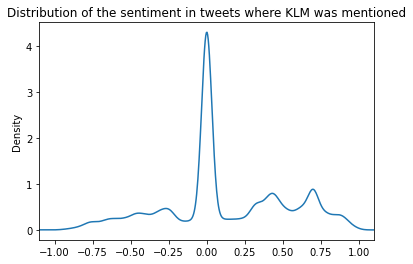

In [15]:
#Creating a plot for sentiment in tweets where klm are mentioned
ax = filtered_df_KLM_mentioned_English['sentiment'].plot(kind= 'density')
ax.set_xlim(-1.1,1.1)
ax.set_title('Distribution of the sentiment in tweets where KLM was mentioned')
filtered_df_KLM_mentioned_English['sentiment'].describe()

In [20]:
#Creating a data frame where the british airways are mentioned in the user mentions 
import pandas as pd

needed_columns={'id_str': 1, 'created_at':1, 'text':1, 'in_reply_to_status_id_str':1, 'in_reply_to_user_id_str':1, 
                'user':1, 'place':1, 'reply_count':1, 'retweet_count':1, 'favorite_count':1, 'entities':1, 
                'lang':1, 'timestamp_ms':1, 'extended_tweet':1, 'quoted_status_id_str':1, 'quoted_status':1}
df_British_mentioned = pd.DataFrame(list(airlines.find({'entities.user_mentions.name':'British Airways'}, needed_columns)))
df_British_mentioned.head()

,_id,created_at,id_str,text,in_reply_to_status_id_str,in_reply_to_user_id_str,user,place,reply_count,retweet_count,favorite_count,entities,lang,timestamp_ms,extended_tweet,quoted_status_id_str,quoted_status
0,645635f2a08f95bceec34b94,Wed May 22 12:20:02 +0000 2019,1131172867985485824,@British_Airways,1131032916232826881,394376606,"{'id': 394376606, 'id_str': '394376606', 'name...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",und,1558527602560,NaN,NaN,NaN
1,645635f2a08f95bceec34b99,Wed May 22 12:20:36 +0000 2019,1131173010508062721,Thanks @British_Airways I really needed the ex...,None,None,"{'id': 1662186764, 'id_str': '1662186764', 'na...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527636540,NaN,NaN,NaN
2,645635f2a08f95bceec34bb6,Wed May 22 12:23:02 +0000 2019,1131173624533213189,RT @renoomokri: Happening Now: Flying to Scand...,None,None,"{'id': 3363341139, 'id_str': '3363341139', 'na...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527782935,NaN,NaN,NaN
3,645635f2a08f95bceec34bd6,Wed May 22 12:25:16 +0000 2019,1131174183814258688,@British_Airways They certainly are! And it wa...,1131124649599918081,18332190,"{'id': 309076025, 'id_str': '309076025', 'name...","{'id': '0100c1ec5a9b2083', 'url': 'https://api...",0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527916278,NaN,NaN,NaN
4,645635f2a08f95bceec34bdc,Wed May 22 12:25:56 +0000 2019,1131174354056822784,@British_Airways Not yet. I'll have a look later,1131171782319329280,18332190,"{'id': 26207568, 'id_str': '26207568', 'name':...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527956867,NaN,NaN,NaN


In [21]:
df_British_mentioned_English = df_British_mentioned[df_British_mentioned['lang'] == 'en']

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound score for a sentence. Its range is from -1 to 1, with -1 being negative and 1 being positive. The range [-0.05, 0.05] is considered as neutral
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the 'text' column and assign the results to the 'sentiment' column
df_British_mentioned_English['sentiment'] = df_British_mentioned_English['text'].apply(get_sentiment_score)

# Print the updated DataFrame
print(df_British_mentioned_English.head())

                        _id                      created_at  \
1  645635f2a08f95bceec34b99  Wed May 22 12:20:36 +0000 2019   
2  645635f2a08f95bceec34bb6  Wed May 22 12:23:02 +0000 2019   
3  645635f2a08f95bceec34bd6  Wed May 22 12:25:16 +0000 2019   
4  645635f2a08f95bceec34bdc  Wed May 22 12:25:56 +0000 2019   
5  645635f2a08f95bceec34bec  Wed May 22 12:27:00 +0000 2019   

                id_str                                               text  \
1  1131173010508062721  Thanks @British_Airways I really needed the ex...   
2  1131173624533213189  RT @renoomokri: Happening Now: Flying to Scand...   
3  1131174183814258688  @British_Airways They certainly are! And it wa...   
4  1131174354056822784   @British_Airways Not yet. I'll have a look later   
5  1131174619224924160  @British_Airways Hello Have DM’d booking ref e...   

  in_reply_to_status_id_str in_reply_to_user_id_str  \
1                      None                    None   
2                      None                    N

<ipython-input-22-6dd459783de3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_British_mentioned_English['sentiment'] = df_British_mentioned_English['text'].apply(get_sentiment_score)


count    524459.000000
mean          0.084162
std           0.406809
min          -0.998000
25%          -0.177900
50%           0.000000
75%           0.419900
max           0.998400
Name: sentiment, dtype: float64

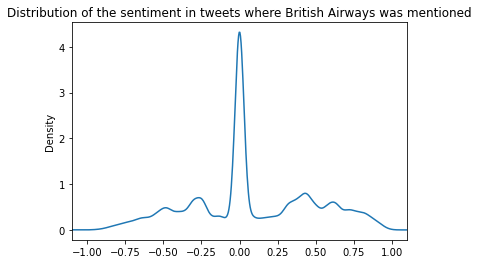

In [24]:
ax = df_British_mentioned_English['sentiment'].plot(kind= 'density')
ax.set_xlim(-1.1,1.1)
ax.set_title('Distribution of the sentiment in tweets where British Airways was mentioned')
df_British_mentioned_English['sentiment'].describe()

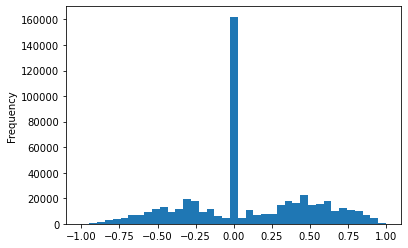

In [33]:
# country_data[countries_in_EU][['population']].plot(kind='hist', bins=20, density=True);
df_British_mentioned_English['sentiment'].plot(kind='hist', bins=39, density=False);

In [3]:
import pandas as pd

needed_columns={'id_str': 1, 'created_at':1, 'text':1, 'in_reply_to_status_id_str':1, 'in_reply_to_user_id_str':1, 
                'user':1, 'place':1, 'reply_count':1, 'retweet_count':1, 'favorite_count':1, 'entities':1, 
                'lang':1, 'timestamp_ms':1, 'extended_tweet':1, 'quoted_status_id_str':1, 'quoted_status':1}
# Define the values and query for user mentions
values = ['American Air','AmericanAir','american air','American_Air', 'Virgin Atlantic','virgin atlantic','Virgin_Atlantic','Lufthansa','Air France','Air_France','air france','air_france','airfrance','AirFrance','EasyJet','Easy Jet','easy jet','RyanAir','Ryan Air','ryanair']
user_mentions_query = {'entities.user_mentions.name': {"$in": values}}

# Define the values and query for text mentions
text_mentions_values = ['American Air','AmericanAir','american air','American_Air', 'Virgin Atlantic','virgin atlantic','Virgin_Atlantic','Lufthansa','Air France','Air_France','air france','air_france','airfrance','AirFrance','EasyJet','Easy Jet','easy jet','RyanAir','Ryan Air','ryanair']
text_mentions_query = {'text': {"$regex": '|'.join(text_mentions_values), "$options": "i"}}

# Combine the user_mentions_query and text_mentions_query using the $or operator
combined_query = {"$or": [user_mentions_query, text_mentions_query]}

# Query the collection and retrieve the data
df_others_mentioned = pd.DataFrame(list(airlines.find(combined_query, needed_columns)))
df_others_mentioned.head()
# # Apply a filtering condition to remove rows where the value of the key 'id' is equal to 56377143
# filtered_df_KLM_mentioned = df_KLM_mentioned[~df_KLM_mentioned['user'].apply(lambda x: x.get('id') == 56377143)]

# # Reset the index of the filtered dataframe
# filtered_df_KLM_mentioned = filtered_df_KLM_mentioned.reset_index(drop=True)

# # Display the filtered dataframe
# filtered_df_KLM_mentioned.head()


# Display the first few rows of the DataFrame
#df_KLM_mentioned.head()

KeyboardInterrupt: 

In [4]:
import pandas as pd

needed_columns={'id_str': 1, 'created_at':1, 'text':1, 'in_reply_to_status_id_str':1, 'in_reply_to_user_id_str':1, 
                'user':1, 'place':1, 'reply_count':1, 'retweet_count':1, 'favorite_count':1, 'entities':1, 
                'lang':1, 'timestamp_ms':1, 'extended_tweet':1, 'quoted_status_id_str':1, 'quoted_status':1}
# Define the values and query for user mentions
values = ['American Air','AmericanAir','american air','American_Air', 'Virgin Atlantic','virgin atlantic','Virgin_Atlantic','Lufthansa','Air France','Air_France','air france','air_france','airfrance','AirFrance','EasyJet','Easy Jet','easy jet','RyanAir','Ryan Air','ryanair']
user_mentions_query = {'entities.user_mentions.name': {"$in": values}}
df_others_mentioned = pd.DataFrame(list(airlines.find(user_mentions_query, needed_columns)))
df_others_mentioned.head()

,_id,created_at,id_str,text,in_reply_to_status_id_str,in_reply_to_user_id_str,user,place,reply_count,retweet_count,favorite_count,entities,lang,timestamp_ms,extended_tweet,quoted_status_id_str,quoted_status
0,645635f2a08f95bceec34b9f,Wed May 22 12:21:23 +0000 2019,1131173207858470913,@PeripateNic @VirginAtlantic Where are you fly...,1130838586281156611,399986728,"{'id': 288109185, 'id_str': '288109185', 'name...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527683592,NaN,NaN,NaN
1,645635f2a08f95bceec34bc2,Wed May 22 12:23:46 +0000 2019,1131173809128706048,@Vskylad @VirginAtlantic Heathrow 😊,1131173207858470913,288109185,"{'id': 399986728, 'id_str': '399986728', 'name...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",en,1558527826946,NaN,NaN,NaN
2,645635f2a08f95bceec34be3,Wed May 22 12:26:29 +0000 2019,1131174491764252672,Great work @lufthansa take a suit carrier off ...,None,None,"{'id': 20072473, 'id_str': '20072473', 'name':...",None,0,0,0,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",en,1558527989699,{'full_text': 'Great work @lufthansa take a su...,NaN,NaN
3,645635f2a08f95bceec34be5,Wed May 22 12:26:42 +0000 2019,1131174543941394432,RT @SiroCuartel: @airfrance @Iberia @lufthansa...,None,None,"{'id': 1129811664902205441, 'id_str': '1129811...",None,0,0,0,"{'hashtags': [{'text': 'Cuba', 'indices': [98,...",es,1558528002139,NaN,NaN,NaN
4,645635f2a08f95bceec34c01,Wed May 22 12:28:53 +0000 2019,1131175093047103488,@ElenaRF @airfrance Ten paciencia ... por algo...,1131006524019609600,74188998,"{'id': 317876941, 'id_str': '317876941', 'name...",None,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",es,1558528133056,NaN,NaN,NaN


In [12]:
import pandas as pd

needed_columns={'id_str': 1, 'created_at':1, 'text':1, 'in_reply_to_status_id_str':1, 'in_reply_to_user_id_str':1, 
                'user':1, 'place':1, 'reply_count':1, 'retweet_count':1, 'favorite_count':1, 'entities':1, 
                'lang':1, 'timestamp_ms':1, 'extended_tweet':1, 'quoted_status_id_str':1, 'quoted_status':1}
# Define the values and query for text mentions
text_mentions_values = ['American Air','AmericanAir','american air','American_Air', 'Virgin Atlantic','virgin atlantic','Virgin_Atlantic','Lufthansa','Air France','Air_France','air france','air_france','airfrance','AirFrance','EasyJet','Easy Jet','easy jet','RyanAir','Ryan Air','ryanair']
text_mentions_query = {'text': {"$regex": '|'.join(text_mentions_values), "$options": "i"}}

# Query the collection and retrieve the data
df_others_mentioned1 = pd.DataFrame(list(airlines.find(text_mentions_query, needed_columns)))
df_others_mentioned1.head()

CursorNotFound: cursor id 3792422719591873523 not found, full error: {'ok': 0.0, 'errmsg': 'cursor id 3792422719591873523 not found', 'code': 43, 'codeName': 'CursorNotFound'}

In [7]:
df_others_mentioned.count()

_id                          382060
created_at                   382060
id_str                       382060
text                         382060
in_reply_to_status_id_str    156549
in_reply_to_user_id_str      197087
user                         382060
place                         17240
reply_count                  382060
retweet_count                382060
favorite_count               382060
entities                     382060
lang                         382060
timestamp_ms                 382060
extended_tweet               107525
quoted_status_id_str          23935
quoted_status                 23920
dtype: int64

In [8]:
# df_British_mentioned_English = df_British_mentioned[df_British_mentioned['lang'] == 'en']
df_others_mentioned_English = df_others_mentioned[df_others_mentioned['lang'] == 'en']

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Create an instance of the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the compound score for a sentence. Its range is from -1 to 1, with -1 being negative and 1 being positive. The range [-0.05, 0.05] is considered as neutral
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the 'text' column and assign the results to the 'sentiment' column
df_others_mentioned_English['sentiment'] = df_others_mentioned_English['text'].apply(get_sentiment_score)

# Print the updated DataFrame
print(df_others_mentioned_English.head())

                        _id                      created_at  \
0  645635f2a08f95bceec34b9f  Wed May 22 12:21:23 +0000 2019   
1  645635f2a08f95bceec34bc2  Wed May 22 12:23:46 +0000 2019   
2  645635f2a08f95bceec34be3  Wed May 22 12:26:29 +0000 2019   
5  645635f2a08f95bceec34c02  Wed May 22 12:28:42 +0000 2019   
6  645635f2a08f95bceec34c15  Wed May 22 12:30:39 +0000 2019   

                id_str                                               text  \
0  1131173207858470913  @PeripateNic @VirginAtlantic Where are you fly...   
1  1131173809128706048                @Vskylad @VirginAtlantic Heathrow 😊   
2  1131174491764252672  Great work @lufthansa take a suit carrier off ...   
5  1131175047241064448  RT @manairport: We couldn't resist snapping th...   
6  1131175541200117761  @BirminghamPride @ManchesterAirp @VirginHolida...   

  in_reply_to_status_id_str in_reply_to_user_id_str  \
0       1130838586281156611               399986728   
1       1131173207858470913               288109

<ipython-input-9-0a7328fab1f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_others_mentioned_English['sentiment'] = df_others_mentioned_English['text'].apply(get_sentiment_score)


In [10]:
df_others_mentioned_English['sentiment'].describe()

count    299316.000000
mean          0.167306
std           0.412231
min          -0.990800
25%           0.000000
50%           0.000000
75%           0.510600
max           0.999400
Name: sentiment, dtype: float64

Text(0.5, 1.0, 'Distribution of the sentiment in tweets where an airline\xa0was\xa0mentioned, except KLM and British Airways')

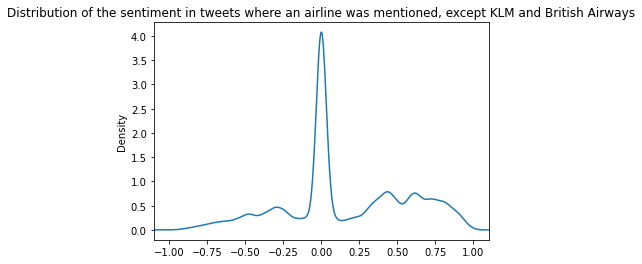

In [11]:
ax = df_others_mentioned_English['sentiment'].plot(kind= 'density')
ax.set_xlim(-1.1,1.1)
ax.set_title('Distribution of the sentiment in tweets where an airline was mentioned, except KLM and British Airways')